In [29]:
!pip install matplotlib
!pip install scipy




[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\Vulcan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\Vulcan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
import matplotlib.pyplot as plt


Description of data set:

State of Washington — This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department...

sourced from https://catalog.data.gov/dataset?q=&sort=views_recent+desc

In [31]:
df = pd.read_csv('EV_population_data.csv')

In [32]:
print(df)

        VIN (1-10)        County               City State  Postal Code  \
0       KM8K33AGXL          King            Seattle    WA      98103.0   
1       1C4RJYB61N          King            Bothell    WA      98011.0   
2       1C4RJYD61P        Yakima             Yakima    WA      98908.0   
3       5YJ3E1EA7J          King           Kirkland    WA      98034.0   
4       WBY7Z8C5XJ      Thurston            Olympia    WA      98501.0   
...            ...           ...                ...   ...          ...   
150477  WBY43AW05P  Grays Harbor          Montesano    WA      98563.0   
150478  5YJ3E1EB7P          King            Seattle    WA      98104.0   
150479  5YJYGDEEXM          King            Seattle    WA      98109.0   
150480  5UXTA6C08P     Snohomish  Mountlake Terrace    WA      98043.0   
150481  7SAYGDEF8N        Skagit       Mount Vernon    WA      98273.0   

        Model Year     Make           Model  \
0             2020  HYUNDAI            KONA   
1             202

In [33]:
# Retrieves tpo 5 values from data set.
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [34]:
# Retrieves a summary of info about EV data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

As the model year increases, the range of electric/hybrid vehicles generally increases, aligning with our expectations.

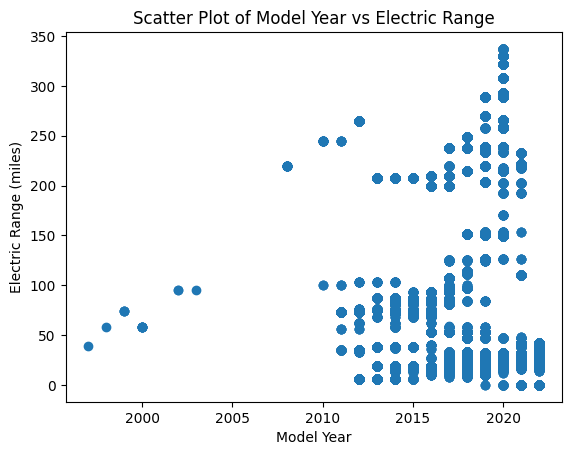

In [45]:

filtered_df = df[df['Model Year'] <= 2022] # Limits model year to up to 2022 and assigns value to filtered_df.

# Create a scatter plot using the filtered DataFrame
plt.scatter(filtered_df['Model Year'], filtered_df['Electric Range'])
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.title('Scatter Plot of Model Year vs Electric Range')

# Show the plot
plt.show()

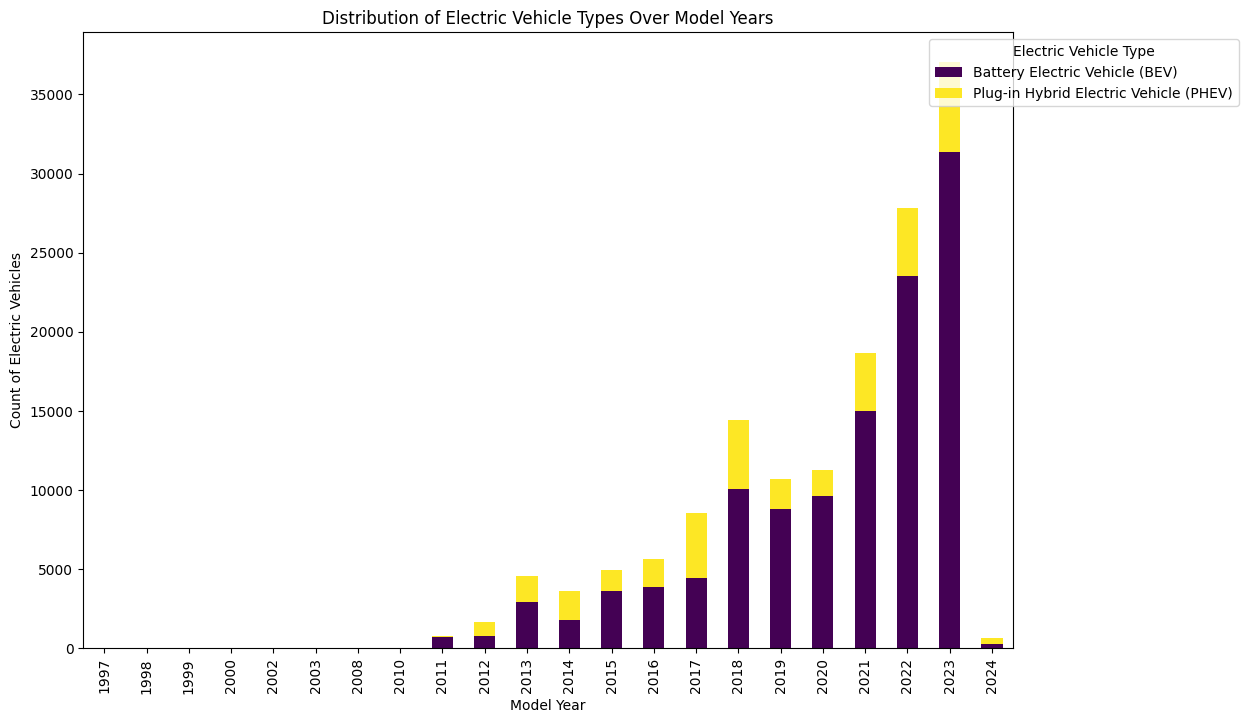

In [49]:

# Group the data by 'Model Year' and 'Electric Vehicle Type' and count the occurrences
year_type_counts = df.groupby(['Model Year', 'Electric Vehicle Type']).size().unstack(fill_value=0)

# Create a stacked bar plot to visualize the distribution
ax = year_type_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Customize the plot labels and legend
plt.title('Distribution of Electric Vehicle Types Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Count of Electric Vehicles')
plt.legend(title='Electric Vehicle Type', loc='upper right', bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()


The bar plot above displays how as the model year has been increasing more vehicles are being manufacturers as full BEV vehicles.